# Midtest - Usecase Python (Apartment Price in Victoria)

## By Firdaus Adi Nugroho

In [124]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

# Dataset
Apartment Price in Victoria

# Background
The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

# Objectives
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living
area environment and apartment conservation status. Determine the best model to predict and
redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

# Instructions
Download the dataset as a CSV file and place it in your current working directory with the filename
"victoria.csv".
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, fromdataset only

## 1. Import Dataset: Load the dataset.

In [89]:
df = pd.read_csv('victoria.csv', sep = ';')
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000.0,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000.0,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000.0,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000.0,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600.0,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


Melakukan load dataset Victoria, dan melakukan display data untuk mengetahui kolom apa saja yang tersedia pada dataset victoria ini.
Beberapa kolom yang akan diolah:
1. Totalprice = menunjukkan harga
2. area = luas apartemen yang akan disewa
3. zone = jenis zona
4. category = kategory dari rumah apartemen
5. Age = umur penghuni
6. floor = Pada lantai berapa penghuni
7. Rooms = Jumlah ruangan yang ditempati penghuni
8. Toilet = Jumlah toilet pada tempat huni
9. Elevator = Adanya lift pada rumah huni

## 2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean,median, modus, max, min, range)

In [90]:
df.describe()

,row.labels,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,280741.523853,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,69298.459358,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


## 3.Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.

In [94]:
numeric = df.columns[[1,2,5]]
data_numeric = df[numeric]
categorical = df.drop(columns=numeric,axis=1)
data_categorical = df.columns

In [95]:
categorical.head()

,row.labels,zone,category,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,Z45,4B,3,5,E100,C,1,0,1,S3,3A,0
1,2,Z31,3B,7,5,E50,A,2,1,1,S5,4A,1
2,3,Z52,3A,8,5,E50,A,2,0,1,S2,3A,0
3,4,Z62,4A,3,4,E50,B,1,0,0,S3,1A,0
4,5,Z31,3A,6,7,E100,A,2,0,1,S4,4A,1


In [97]:
data_numeric.head()

,totalprice,area,age
0,228000.0,7530999756,33
1,409000.0,1006500015,5
2,200000.0,8887000275,14
3,180000.0,6261000061,41
4,443600.0,1461499939,22


Melakukan split antara data numeric dan data categorical agar memudahkan Visualisasi Data

In [93]:
df['conservation'][df['conservation'] == '1A'] = 'A'
df['conservation'][df['conservation'] == '2A'] = 'B'
df['conservation'][df['conservation'] == '2B'] = 'C'
df['conservation'][df['conservation'] == '3A'] = 'C'

Melakukan pembaharuan kolom "conservation"

## Korelasi Antar Variabel

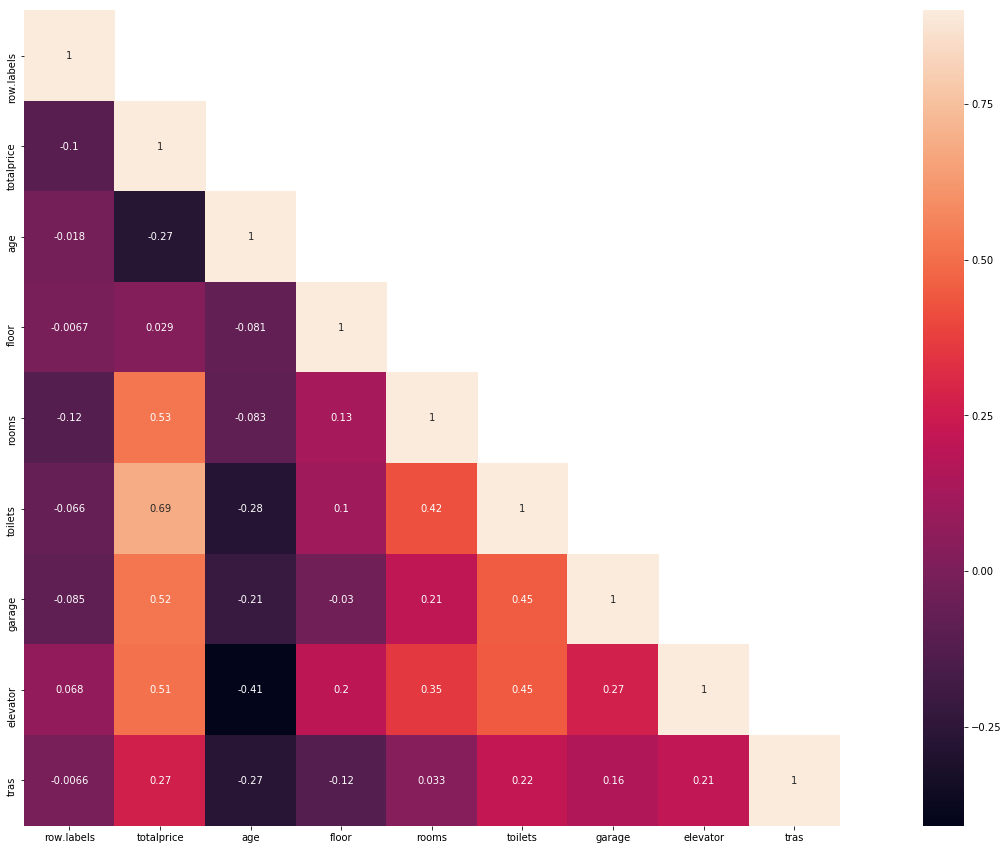

In [100]:
#create correlation with hitmap

#from this correlation, we know the value percentages of the correlation(1 or -1). The bigger value, so the correlation has big value too.
#weather has big correlation with the lattitude (-0,78). 

#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(30,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Mari kita fokus terhadap variabel totalprice terhadap variabel lain. Karena totalprice akan saya gunakan untuk melakukan model
Korelasi paling besar terhadap totalprice ialah toilets dan rooms, sementara korelasi paling kecil ialah floor sehingga mungkin kita bisa hapus floor sebagai variabel untuk melakukan regresi<br>
Kita dapat melakukan Data Visualisasi berdasarkan nilai korelasi yang cukup tinggi agar mendukung analisis sebelum melakukan pemodelan

## Jumlah terbanyak antara Rooms, toiltes, garage, dan elevator

<function matplotlib.pyplot.show>

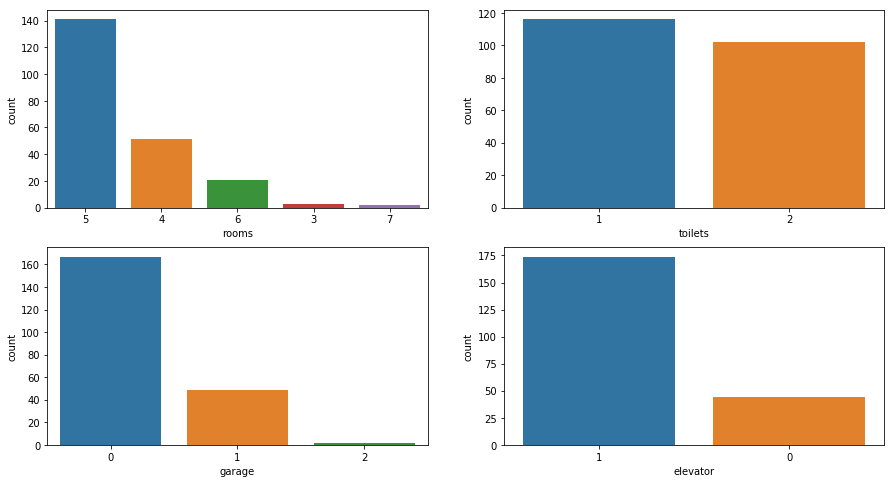

In [58]:
f=plt.figure(figsize=(15,8))
j=1
for i in data_categorical[[7,10,11,12]]:
    f.add_subplot(2,2,j)
    sns.countplot(df[i],order=df[i].value_counts().index)
    j+=1
plt.show

### Kesimpulan
Pada data diatas kita dapat simpulkan bahwa:
1. Setiap rumah huni apartemen, Paling banyak memiliki 5 ruangan
2. Setiap rumah huni hanya memiliki 1 atau 2 toilet dengan 1 toilet memiliki sedikit lebih banyak daripada yang memiliki 2 toilet
3. Setiap rumah hini kebanyakan tidak memiliki garasi di apartemen.<br>

Sehingga dari rumah huni apartemen yang paling banyak ialah terdiri dari 5 ruangan, 1 buah toilet, dan tidak memiliki garasi

## Perbandingan antara harga rumah huni apartemen terhadap category apartemen dan rooms

Text(0.5,1,'')

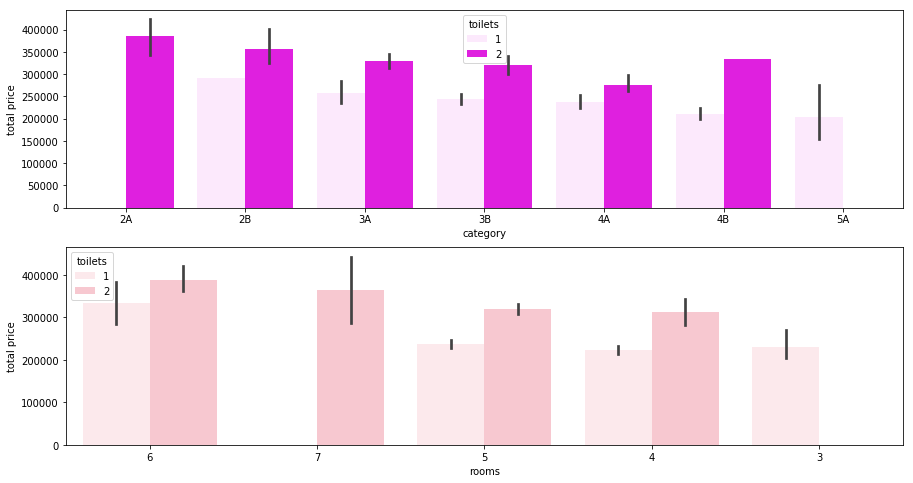

In [110]:
category_sort = df[['category','totalprice']].groupby('category').mean().sort_values('totalprice', ascending=False)
room_sort = df[['rooms','totalprice']].groupby('rooms').mean().sort_values('totalprice', ascending=False)

f = plt.figure(figsize=(15,8))

f.add_subplot(2,1,1)
sns.barplot(df['category'], df['totalprice'], color = 'magenta',data=df, hue='toilets',order = category_sort.index )
plt.xlabel('category')
plt.ylabel('total price')
plt.title('')

f.add_subplot(2,1,2)
sns.barplot(df['rooms'], df['totalprice'], color = 'pink', data=df, hue='toilets',order = room_sort.index)
plt.xlabel('rooms')
plt.ylabel('total price')
plt.title('')

### Kesimpulan:
Pada category berbanding harga, kategori 3B, merupakan rata-rata category rumah huni yg paling mahal dan kategori 5A merupakan category rumah paling rumah rata-rata.<br>
sedangkan semakin banyak ruangan cenderung semakin mahal harga rumah huni apartemen. Tetapi pada jumlah ruangan 7, cenderung lebih murah dibanding ruangan 6. <br>
Kedua variabel ini dapat mempengaruhi harga dari suatu hunian apartemen

## Perbandingan totalprice(harga) terhadap variabel yang memiliki korelasi tinggi (zone, elevator, toilets, dan garage)

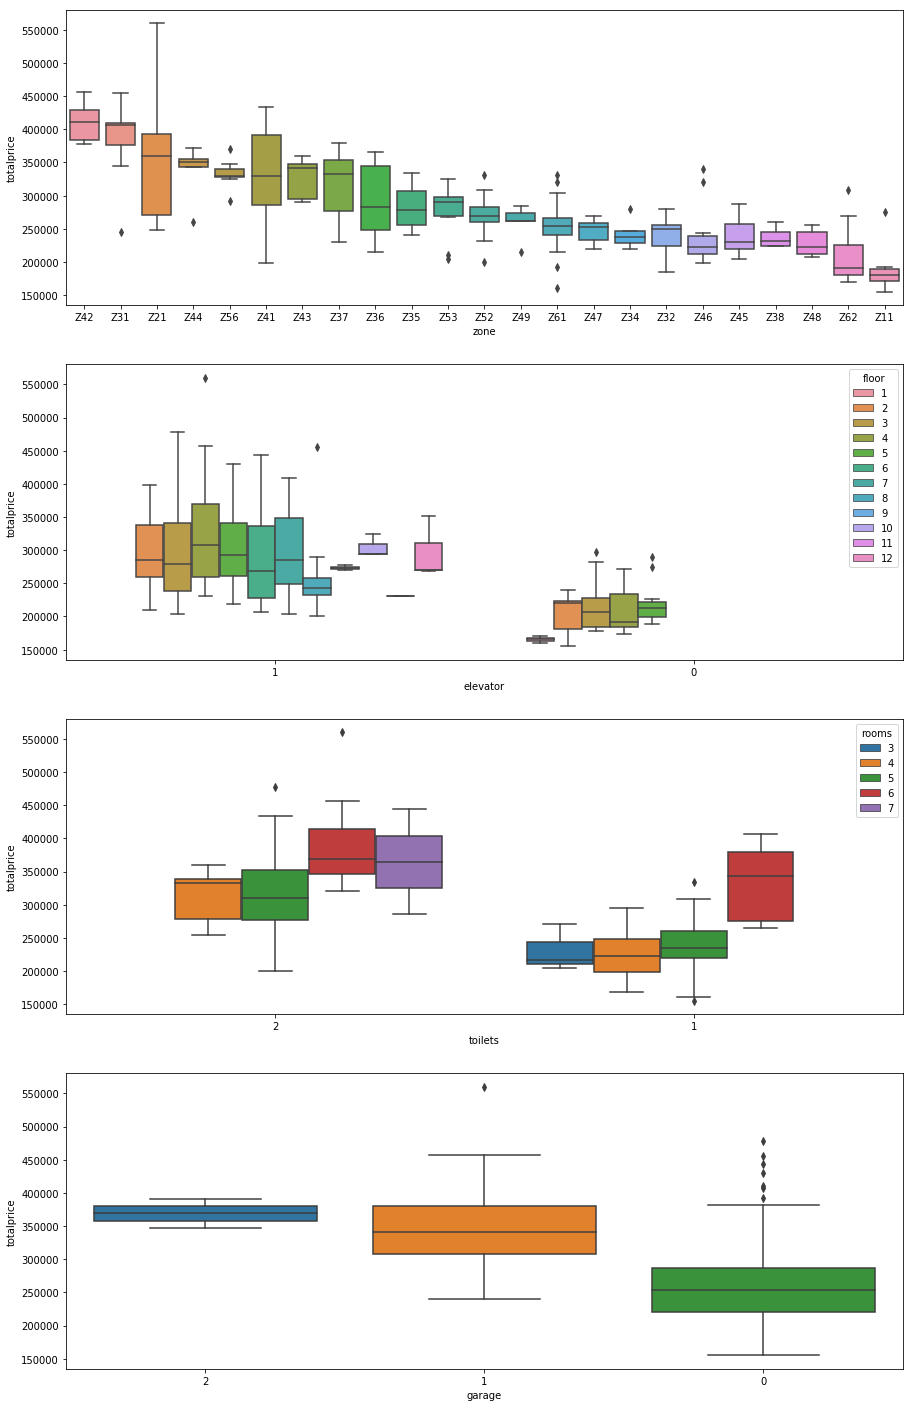

In [116]:
zone_sort = df[['zone','totalprice']].groupby('zone').mean().sort_values('totalprice', ascending=False)
elevator_sort = df[['elevator','totalprice']].groupby('elevator').mean().sort_values('totalprice', ascending=False)
toilets_sort = df[['toilets','totalprice']].groupby('toilets').mean().sort_values('totalprice', ascending=False)
garage_sort = df[['garage','totalprice']].groupby('garage').mean().sort_values('totalprice', ascending=False)

f= plt.figure(figsize=(15,25))

f.add_subplot(4,1,1)
sns.boxplot(x="zone", y="totalprice", data = df,order = zone_sort.index)

f.add_subplot(4,1,2)
sns.boxplot(x="elevator", y="totalprice", data = df,order = elevator_sort.index, hue='floor')

f.add_subplot(4,1,3)
sns.boxplot(x="toilets", y="totalprice", data = df,order = toilets_sort.index, hue='rooms')

f.add_subplot(4,1,4)
sns.boxplot(x="garage", y="totalprice", data = df,order = garage_sort.index)
plt.show()

### Kesimpulan
Perbandingan ini menunjukkan bahwa korelasi harga apartemen terhadap parameter zone, elevator, toilets, dan garage<br>
1. Zone: Z42 merupakan daerah termahal dalam segi harga dan Z11 merupakan daerah terendah
2. Elevator: Jika adanya Elevator tentunya akan memengaruhi harga lebih mahal, ditunjukkan pada visualisasi diatas. Selain itu, semakin tinggi apartemen juga semakin bergantung adanya elevator
3. toilets: Semakin banyak jumlah toilet, rata-rata harga pun juga semakin naik.
4. Garage: Semakin banyak jumlah garasi, juga mempengaruhi harga suatu rumah huni apartemen

## Perbandingan persebaran data antara umur dan harga rumah huni apartemen

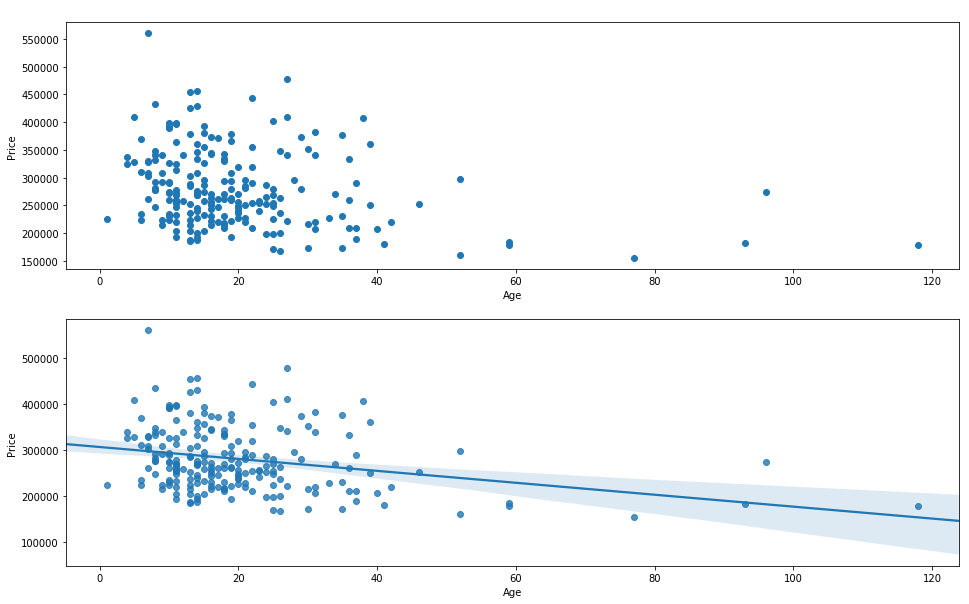

In [113]:
f = plt.figure(figsize=(16, 10))

f.add_subplot(2,1,1)
plt.scatter(df['age'],df['totalprice'])
plt.title(' ')
plt.xlabel('Age')
plt.ylabel('Price')

f.add_subplot(2,1,2)
sns.regplot(x = 'age', y = 'totalprice', data = df)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

### Kesimpulan
Kesimpulan dari persebaran diatas ialah rata-rata rumah hunian ialah kisaran 200.000 hingga 300.000 pada rentang umur penghuni 15-25

## 4. Variable Selection: Choose the variable and its reason.

In [117]:
y = df['totalprice']
x = df.drop(['totalprice','area','row.labels','floor'],axis=1)

x = pd.get_dummies(x)
x.head()

,age,rooms,toilets,garage,elevator,tras,zone_Z11,zone_Z21,zone_Z31,zone_Z32,...,conservation_B,conservation_C,streetcategory_S2,streetcategory_S3,streetcategory_S4,streetcategory_S5,heating_1A,heating_3A,heating_3B,heating_4A
0,33,5,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5,5,2,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,14,5,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,41,4,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,22,7,2,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


Untuk pemodelan ini, saya memilih totalprice karena dapat dikorelasikan terhadap semua variabel yang ada di dataset. Untuk pemodelan tentunya perlu parameter variabel yang digunakan. Variabel yang digunakan ialah variabel yang memiliki cukup ataupun tinggi korelasi terhadap totalprice<br>
Oleh karena itu, area, row.labels, dan floor tidak dijadikan parameter karena memiliki korelasi yang kecil terhadap totalprice

## 5. Modelling: Create models

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Melakukan split dataset training dan testing menjadi training(80%), dan testing(20%)

In [119]:
all_model = [DecisionTreeRegressor,
            LinearRegression,
             Ridge,
             Lasso,
             KNeighborsRegressor,
             #SVR,
            RandomForestRegressor,
            GradientBoostingRegressor]

desc_model = ['DecisionTreeRegressor',
            'LinearRegression',
             'Ridge Regression',
             'Lasso Regression',
             'KNeighborsRegressor',
            # 'SVR',
            'RandomForestRegressor',
            'GradientBoostingRegressor']

all_model

[sklearn.tree.tree.DecisionTreeRegressor,
 sklearn.linear_model.base.LinearRegression,
 sklearn.linear_model.ridge.Ridge,
 sklearn.linear_model.coordinate_descent.Lasso,
 sklearn.neighbors.regression.KNeighborsRegressor,
 sklearn.ensemble.forest.RandomForestRegressor,
 sklearn.ensemble.gradient_boosting.GradientBoostingRegressor]

Melakukan modelling menggunakan DecisionTreeRegression, LinearRegression,Ridge Regression, Lasso Regression, KN Regression, Random Forest Regression, dan Gradieng Boosting Regression. <br>
Semua model dilakukan dan nantinya akan dilihat hasil dan tingkat akurasi mana yang terbaik untuk dipilih sebagai model yang digunakan

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    R2_train.append(model.score(x_train,y_train))
    R2_test.append(model.score(x_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/df['totalprice'].mean())

Melakukan looping untuk menguji semua model yang sudah ditetapkan sebelumnya. Pengujian yang dilakukan menggunakan RMSE(Root Mean Squared Error, Coeficience Variance, lalu melihat GAP dari R Square

In [121]:
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
2,Ridge Regression,32801.186412,0.116838,0.872191,0.815055,0.057137
3,Lasso Regression,32497.937314,0.115758,0.878624,0.818458,0.060165
1,LinearRegression,32497.928110,0.115757,0.878624,0.818459,0.060165
6,GradientBoostingRegressor,33426.544203,0.119065,0.956032,0.807935,0.148097
5,RandomForestRegressor,39385.841445,0.140292,0.940252,0.733348,0.206904
0,DecisionTreeRegressor,34916.866279,0.124374,0.998768,0.790427,0.208341
4,KNeighborsRegressor,61826.252994,0.220225,0.591764,0.342932,0.248832


Berikut adalah hasil dari pengujiannya<br>
Saya memilih Ridge Regression karena paramter yang sangat penting ialah melihat dari R Square Gap nya dimana perbandingan antara training dan testing nya kecil. Hal itu merepresentasikan bahwa tingkat akurasi yang dilakukan untuk melakukan prediksi cukup tinggi karena hasil training dan testingnya GAP nya kecil

In [122]:
from sklearn.linear_model import Ridge 
model = Ridge()
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Melakukan pemodelan dari Ridge Regression

## 6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)

In [32]:
rmse = mean_squared_error(y_test,y_pred)

In [33]:
r2 = r2_score(y_test,y_pred)

In [34]:
cv = rmse/df['totalprice'].mean()

In [35]:
print('root mean squared error: ',rmse)
print('r2 score: ',r2)
print('coofisien Variance: ',cv)

root mean squared error:  1083482505.1652102
r2 score:  0.8137542462258823
coofisien Variance:  3859.359635490622


# Kesimpulan

Dalam menyelesaikan permasalahan Toni yang ingin memprediksi harga Apartemen.
1. Pertama-tama Toni melakukan Pre-Processing data yang meliputi me-load data, melihat overview data.
2. Lalu,Toni melakukan analisa data dengan melihat visualisasi data sehingga parameter apa saja yang bisa dibandingkan yang dapat mempengaruhi harga suatu apartemen di Victoria.
3. Setelah menganalisa visualisasi data, Toni membandingkan model mana yang terbaik untuk digunakan prediksi dengan membandingkan beberapa model seperti: DecisionTreeRegression, LinearRegression,Ridge Regression, Lasso Regression, KN Regression, Random Forest Regression, dan Gradieng Boosting Regression. Dan setelah dibandingkan, muncullah hasil terbaik yaitu menggunakan **Ridge Regression** karena GAP dari data training dan data testingnya kecil sehingga bisa terlihat keakurasian untuk prediksinya.
4. Lalu Toni melakukan pemodelan menggunakan Ridge Reggression.
5. Setelah mengembangkan pemodelan, Toni mengevaluasi hasil pemodelan dan keakuratan dari pemodelan Toni menggunakan RMSE dan R2 Score. Setelah dilihat ternyata hasil evaluasi Toni cukup yaitu dengan nilai R2 Score 0,81.<br>
Alhasil, Toni dapat menyelesaikan prediksi harga Apartemen menggunakan model Ridge Regression dan analisis-analisis yang dilakukan sebelumnya